# Basic NLP Course

## Introduction to Bag of N-Grams Models and TF-IDF

The Bag of N-Grams model and Term Frequency-Inverse Document Frequency (TF-IDF) are two popular techniques in Natural Language Processing (NLP) for representing text data. While the Bag of N-Grams model focuses on capturing sequences of words, TF-IDF emphasizes the importance of words in a document relative to a collection of documents.

### Term Frequency-Inverse Document Frequency (TF-IDF)

- **Definition**: A statistical measure that evaluates the importance of a word in a document relative to a collection (or corpus) of documents.
- **Formula**:
    - **Term Frequency (TF)**: Measures how often a word appears in a document.
      \[
      TF(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
      \]
    - **Inverse Document Frequency (IDF)**: Measures how unique or rare a word is across all documents.
      \[
      IDF(t, D) = \log \frac{\text{Total number of documents in corpus } D}{\text{Number of documents containing term } t}
      \]
    - **TF-IDF**: Combines TF and IDF.
      \[
      TF\text{-}IDF(t, d, D) = TF(t, d) \times IDF(t, D)
      \]
- **Advantages**:
    - Highlights important words in a document.
    - Reduces the impact of common words (e.g., "the", "is") that appear frequently across documents.
- **Limitations**:
    - Ignores word order and context.
    - Computationally expensive for large corpora.

### Comparison: Bag of N-Grams vs. TF-IDF

| Feature                | Bag of N-Grams                | TF-IDF                          |
|------------------------|-------------------------------|---------------------------------|
| **Representation**     | Sequences of `n` words        | Weighted importance of words    |
| **Context**            | Preserves local word order    | Ignores word order              |
| **Vocabulary Size**    | Larger (increases with `n`)   | Smaller                         |
| **Computational Cost** | Higher                        | Moderate                        |
| **Use Cases**          | Tasks requiring context and word order | Information retrieval, text ranking |

### Example

Consider the sentence:
- "The cat is on the mat."

**Bag of 2-Grams Representation**:
- Vocabulary: {"the cat", "cat is", "is on", "on the", "the mat"}
- Vector: [1, 1, 1, 1, 1]

**TF-IDF Representation**:
- Vocabulary: {"the", "cat", "is", "on", "mat"}
- Vector: [0.0, 0.5, 0.5, 0.5, 0.5] (assuming "the" is a common word across documents and has low IDF).

### Pros and Cons

| Feature       | Bag of N-Grams                                    | TF-IDF                                      |
|---------------|---------------------------------------------------|--------------------------------------------|
| **Pros**      | Captures local context and word order.            | Highlights important words in a document.  |
|               | Useful for tasks like sentiment analysis and machine translation. | Reduces the influence of common words.     |
| **Cons**      | High computational cost and memory usage.         | Ignores word order and context.            |
|               | Vocabulary size grows significantly with `n`.     | May not capture relationships between words.|


In [1]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [2]:
# load work order samples
data = pd.read_csv('../data/work_orders_sample.csv')
data.head()

,failure_mode,description
0,Internal leakage,Compressor CP-001 is experiencing internal lea...
1,Abnormal instrument reading,Compressor CP-101 is showing abnormal pressure...
2,Abnormal instrument reading,Compressor C-101 is giving an abnormal high pr...
3,Abnormal instrument reading,Compressor C-101-A is giving abnormal instrume...
4,Abnormal instrument reading,Compressor CP-101 is giving an abnormal instru...


In [3]:
# Create a set of unique failure modes
failure_mode_set = set(data['failure_mode'])

# Map each failure mode to an index
failure_mode_mapping = {mode: idx for idx, mode in enumerate(failure_mode_set)}

# Replace the failure_mode column with the corresponding indices
data['failure_mode'] = data['failure_mode'].map(failure_mode_mapping)

# Display the updated dataframe and the mapping
print(data.head())
print(failure_mode_mapping)

   failure_mode                                        description
0             4  Compressor CP-001 is experiencing internal lea...
1            14  Compressor CP-101 is showing abnormal pressure...
2            14  Compressor C-101 is giving an abnormal high pr...
3            14  Compressor C-101-A is giving abnormal instrume...
4            14  Compressor CP-101 is giving an abnormal instru...
{'Structural deficiency': 0, 'Vibration': 1, 'Failure to stop on demand': 2, 'Spurious stop': 3, 'Internal leakage': 4, 'Erratic output': 5, 'External leakage - utility medium': 6, 'Minor in-service problems': 7, 'Overheating': 8, 'External leakage - process medium': 9, 'Parameter deviation': 10, 'High output': 11, 'Low output': 12, 'Failure to start on demand': 13, 'Abnormal instrument reading': 14, 'Breakdown': 15, 'Noise': 16, 'Plugged / Choked': 17}


In [5]:
# Select a random description
random_description = data['description'].sample(1).iloc[0]

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the descriptions in the dataset
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'])

# Transform the random description
tfidf_output = tfidf_vectorizer.transform([random_description])

# Display the random description and its TF-IDF output
print("Random Description:")
print(random_description)
print("\nTF-IDF Output:")
print(tfidf_output.toarray())
# Display the vocabulary learned by the TF-IDF vectorizer
print("\nTF-IDF Vocabulary:")
print(tfidf_vectorizer.vocabulary_)

Random Description:
Inspect compressor for abnormal noise, possibly due to worn bearings.

TF-IDF Output:
[[0. 0. 0. ... 0. 0. 0.]]

TF-IDF Vocabulary:
{'compressor': 376, 'cp': 446, '001': 1, 'is': 865, 'experiencing': 619, 'internal': 851, 'leakage': 890, 'likely': 906, 'caused': 295, 'by': 273, 'worn': 1705, 'out': 1072, 'piston': 1132, 'ring': 1302, 'resulting': 1298, 'in': 800, 'noticeable': 1030, 'drop': 557, 'discharge': 528, 'pressure': 1164, 'requiring': 1281, 'replacement': 1271, 'of': 1041, 'the': 1541, 'to': 1559, 'restore': 1291, 'normal': 1028, 'operation': 1057, '101': 37, 'showing': 1388, 'abnormal': 128, 'readings': 1220, 'specifically': 1430, 'gauge': 717, 'reading': 1219, '10': 32, 'higher': 765, 'than': 1539, 'this': 1549, 'issue': 867, 'faulty': 645, 'sensor': 1357, 'which': 1689, 'may': 966, 'be': 224, 'due': 563, 'incorrect': 811, 'calibration': 283, 'observable': 1034, 'symptom': 1514, 'unusually': 1627, 'high': 764, 'on': 1049, 'concern': 385, 'as': 197, 'it': 

In [7]:
def preprocess_text(text):
    doc = nlp(text)
    # removing stop words and punctuation
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]

    # stemming or lemmatization can be added here if needed
    lemmatized_tokens = [token.lemma_ for token in nlp(' '.join(tokens))]

    return ' '.join(lemmatized_tokens)

def train_and_evaluate_ngram_model(ngram_range=(1, 1), x_train=None, x_test=None, y_train=None, y_test=None, tfidf=False):
    # Choose the vectorizer based on the tfidf parameter
    vectorizer = TfidfVectorizer(ngram_range=ngram_range) if tfidf else CountVectorizer(ngram_range=ngram_range)
    
    # Create a pipeline with the chosen vectorizer and MultinomialNB
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', MultinomialNB())
    ])
    
    # Train the model on the training data
    pipeline.fit(x_train, y_train.values.ravel())
    
    # Get the vocabulary length from the vectorizer
    vocabulary_length = len(pipeline.named_steps['vectorizer'].vocabulary_)
    
    # Predict on the test set
    y_pred = pipeline.predict(x_test)
    
    # Calculate the overall F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return f1, vocabulary_length

def train_with_preprocessing(ngram_range=(1, 1), preprocess=False, tfidf=False):
    if preprocess:
        # Apply text preprocessing
        data['text_clean'] = data['description'].apply(preprocess_text)
        x_column = 'text_clean'
    else:
        x_column = 'description'
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(
        data[x_column], data['failure_mode'], test_size=0.2, random_state=42, stratify=data['failure_mode']
    )
    
    # Train and evaluate the model
    f1, vocab_length = train_and_evaluate_ngram_model(ngram_range, x_train, x_test, y_train, y_test, tfidf=tfidf)
    
    return f1, vocab_length

In [8]:
# Define the n-gram ranges
ngram_ranges = [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 2), (2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 4), (4, 5), (5, 5)]

# Initialize dictionaries to store results for preprocessing True and False
results = {
    True: {'tfidf': {'f1_scores': [], 'vocab_sizes': []}, 'count': {'f1_scores': [], 'vocab_sizes': []}},
    False: {'tfidf': {'f1_scores': [], 'vocab_sizes': []}, 'count': {'f1_scores': [], 'vocab_sizes': []}}
}

# Call train_with_preprocessing for each n-gram range, preprocessing option, and vectorizer type
for preprocess in [True, False]:
    for tfidf in [True, False]:
        vectorizer_type = 'tfidf' if tfidf else 'count'
        for ngram_range in ngram_ranges:
            print(f"Training with ngram_range={ngram_range}, preprocess={preprocess}, vectorizer={vectorizer_type}")
            f1, vocab_size = train_with_preprocessing(ngram_range=ngram_range, preprocess=preprocess, tfidf=tfidf)
            results[preprocess][vectorizer_type]['f1_scores'].append(f1)
            results[preprocess][vectorizer_type]['vocab_sizes'].append(vocab_size)

Training with ngram_range=(1, 1), preprocess=True, vectorizer=tfidf
Training with ngram_range=(1, 2), preprocess=True, vectorizer=tfidf
Training with ngram_range=(1, 3), preprocess=True, vectorizer=tfidf
Training with ngram_range=(1, 4), preprocess=True, vectorizer=tfidf
Training with ngram_range=(1, 5), preprocess=True, vectorizer=tfidf
Training with ngram_range=(2, 2), preprocess=True, vectorizer=tfidf
Training with ngram_range=(2, 3), preprocess=True, vectorizer=tfidf
Training with ngram_range=(2, 4), preprocess=True, vectorizer=tfidf
Training with ngram_range=(2, 5), preprocess=True, vectorizer=tfidf
Training with ngram_range=(3, 3), preprocess=True, vectorizer=tfidf
Training with ngram_range=(3, 4), preprocess=True, vectorizer=tfidf
Training with ngram_range=(3, 5), preprocess=True, vectorizer=tfidf
Training with ngram_range=(4, 4), preprocess=True, vectorizer=tfidf
Training with ngram_range=(4, 5), preprocess=True, vectorizer=tfidf
Training with ngram_range=(5, 5), preprocess=Tru

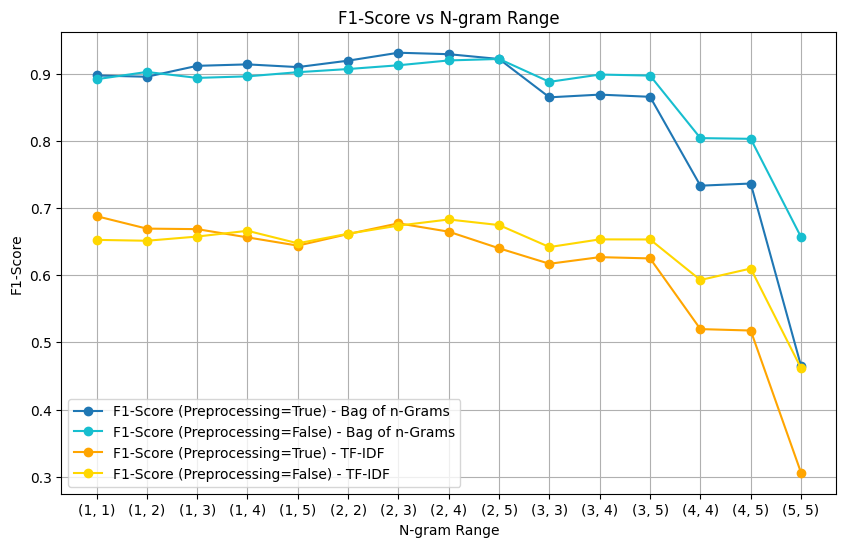

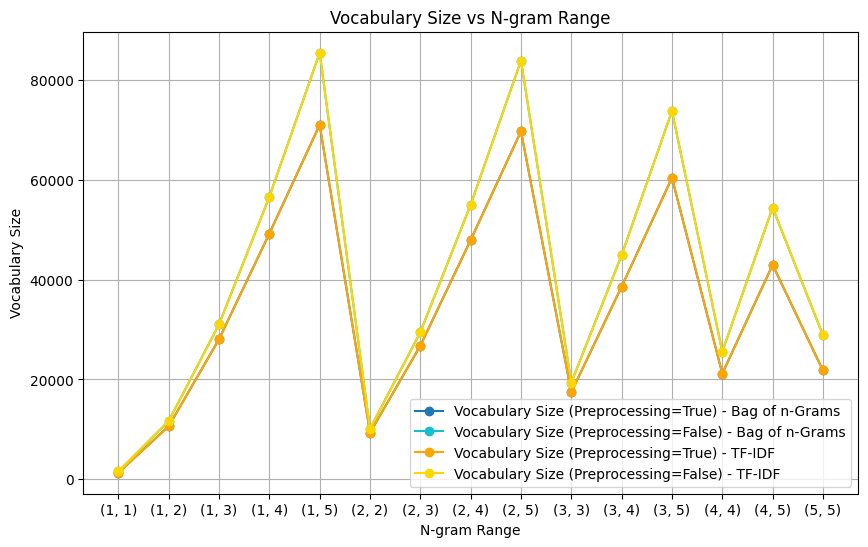

In [ ]:
# Plot F1-scores
plt.figure(figsize=(10, 6))
plt.plot([str(r) for r in ngram_ranges], results[True]['count']['f1_scores'], color='tab:blue', marker='o', label='F1-Score (Preprocessing=True) - Bag of n-Grams')
plt.plot([str(r) for r in ngram_ranges], results[False]['count']['f1_scores'], color='tab:cyan', marker='o', label='F1-Score (Preprocessing=False) - Bag of n-Grams')
plt.plot([str(r) for r in ngram_ranges], results[True]['tfidf']['f1_scores'], color='orange', marker='o', label='F1-Score (Preprocessing=True) - TF-IDF')
plt.plot([str(r) for r in ngram_ranges], results[False]['tfidf']['f1_scores'], color='gold', marker='o', label='F1-Score (Preprocessing=False) - TF-IDF')
plt.xlabel('N-gram Range')
plt.ylabel('F1-Score')
plt.title('F1-Score vs N-gram Range')
plt.legend()
plt.grid()
plt.show()

# Plot Vocabulary Sizes
plt.figure(figsize=(10, 6))
plt.plot([str(r) for r in ngram_ranges], results[True]['count']['vocab_sizes'], color='tab:blue', marker='o', label='Vocabulary Size (Preprocessing=True) - Bag of n-Grams')
plt.plot([str(r) for r in ngram_ranges], results[False]['count']['vocab_sizes'], color='tab:cyan', marker='o', label='Vocabulary Size (Preprocessing=False) - Bag of n-Grams')
plt.plot([str(r) for r in ngram_ranges], results[True]['tfidf']['vocab_sizes'], color='orange', marker='o', label='Vocabulary Size (Preprocessing=True) - TF-IDF')
plt.plot([str(r) for r in ngram_ranges], results[False]['tfidfb']['vocab_sizes'], color='gold', marker='o', label='Vocabulary Size (Preprocessing=False) - TF-IDF')
plt.xlabel('N-gram Range')
plt.ylabel('Vocabulary Size')
plt.title('Vocabulary Size vs N-gram Range')
plt.legend()
plt.grid()
plt.show()

# Conclusions from N-gram Experiments

## Best Configuration
- **Bag-of-n-Grams with preprocessing**, using n-gram range **(1,2) or (1,3)**, achieves the highest F1-score (~0.92).
- This setting balances **performance and vocabulary size** (~30k–55k terms).

## TF-IDF vs Bag-of-n-Grams
- **TF-IDF underperforms** compared to Bag-of-n-Grams (max ~0.7 F1).
- Likely because work order descriptions are short, and **absolute frequency** of terms is more informative than relative weighting.

## Effect of Preprocessing
- Preprocessing (stemming, lemmatization, stopword removal) provides **small performance improvements** only for Bag-of-n-Grams.
- For TF-IDF, preprocessing has almost **no effect**.
- Domain-specific stopwords may matter more than generic ones.

## Impact of Higher-Order N-grams
- Vocabulary size **explodes** with higher n-grams (peaking >80k terms at (1,5)/(2,5)).
- This leads to **sparsity and degraded performance** (F1 < 0.5 at (5,5)).
- **Recommendation**: Avoid n-grams beyond 3.

## Overall Takeaways
- Stick to **Bag-of-n-Grams (1,2) or (1,3)**.
- **Skip TF-IDF** unless domain-specific tuning suggests otherwise.
- Use preprocessing selectively; do not over-rely on it.
- Consider **custom stopword lists** and **class imbalance handling** for further gains.
